In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# My data is in google drive.
train_dir ="drive/My Drive/AG/Leaves/"
test_dir="drive/My Drive/AG/Leaves"

In [ ]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [ ]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir) # For testing i took only few samples from unseen data. we can evaluate using validation data which is part of train data.
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

15 Classes
7005 Train images
7005 Test images


In [ ]:
# Preprocessing data.
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, # validation split 20%.
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
# set height and width and color of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)

Found 7004 images belonging to 15 classes.
Found 7004 images belonging to 15 classes.


In [ ]:
# The name of the 21 diseases.
train_generator.class_indices

{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato__Target_Spot': 11,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12,
 'Tomato__Tomato_mosaic_virus': 13,
 'Tomato_healthy': 14}

In [ ]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 82, 82, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 23104)             0

In [ ]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


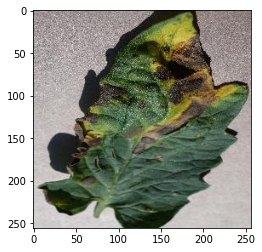

In [ ]:
# Take one image to visualize it's changes after every layer
from keras.preprocessing import image
import numpy as np
img1 = image.load_img('/content/drive/My Drive/AG/Leaves/Tomato_Early_blight/2832ca53-be67-44c0-ac55-eb815bd85fd3___RS_Erly.B 8242.JPG')
plt.imshow(img1);

#preprocess image
img1 = image.load_img('/content/drive/My Drive/AG/Leaves/Tomato_Early_blight/2832ca53-be67-44c0-ac55-eb815bd85fd3___RS_Erly.B 8242.JPG')
img = image.img_to_array(img1)
img = img/255

In [ ]:
# validation data.
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size)

Found 7004 images belonging to 15 classes.


In [ ]:
#Model building to get trained with parameters.
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
train=model.fit_generator(train_generator,
                          epochs=15,                            
                          steps_per_epoch=train_generator.samples//batch_size,                       
                          validation_data=validation_generator,
                          validation_steps=validation_generator.samples // batch_size,verbose=1)

Epoch 1/15
218/218 [==============================] - 3776s 17s/step - loss: 2.3506 - accuracy: 0.2222 - val_loss: 1.0846 - val_accuracy: 0.6345
Epoch 2/15
218/218 [==============================] - 673s 3s/step - loss: 1.1095 - accuracy: 0.6245 - val_loss: 0.7694 - val_accuracy: 0.7403
Epoch 3/15
218/218 [==============================] - 677s 3s/step - loss: 0.8449 - accuracy: 0.7107 - val_loss: 0.6909 - val_accuracy: 0.7841
Epoch 4/15
218/218 [==============================] - 676s 3s/step - loss: 0.6863 - accuracy: 0.7615 - val_loss: 0.4344 - val_accuracy: 0.8489
Epoch 5/15
218/218 [==============================] - 674s 3s/step - loss: 0.5418 - accuracy: 0.8092 - val_loss: 0.3701 - val_accuracy: 0.8716
Epoch 6/15
218/218 [==============================] - 670s 3s/step - loss: 0.4997 - accuracy: 0.8280 - val_loss: 0.3998 - val_accuracy: 0.8621
Epoch 7/15
218/218 [==============================] - 672s 3s/step - loss: 0.4265 - accuracy: 0.8570 - val_loss: 0.3482 - val_accuracy: 0.88

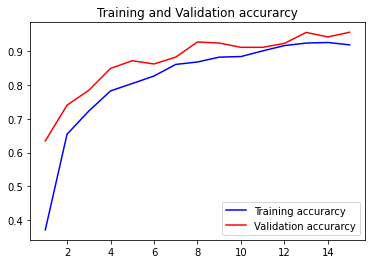

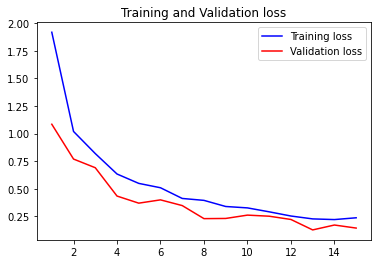

In [ ]:
accuracy = train.history['accuracy']
val_accuracy = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(1, len(accuracy) + 1)

#Train and validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accurarcy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
# Save entire model with optimizer, architecture, weights and training configuration.
from keras.models import load_model
model.save('crop.h5')

In [ ]:
# Save model weights.
from keras.models import load_model
model.save_weights('crop_weights.h5')

In [ ]:

# Loading model and predict.
from keras.models import load_model
model=load_model('crop.h5')

Classes = ["Potato___Early_blight","Potato___Late_blight","Potato___healthy","Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___Late_blight","Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite","Tomato___Target_Spot","Tomato___Tomato_mosaic_virus","Tomato___healthy"]

Tomato___Leaf_Mold


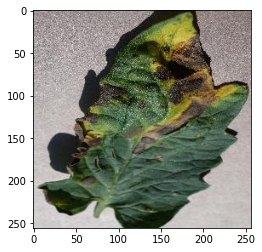

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256,256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('/content/drive/My Drive/AG/Leaves/Tomato_Early_blight/2832ca53-be67-44c0-ac55-eb815bd85fd3___RS_Erly.B 8242.JPG')])
disease=image.load_img('/content/drive/My Drive/AG/Leaves/Tomato_Early_blight/2832ca53-be67-44c0-ac55-eb815bd85fd3___RS_Erly.B 8242.JPG')
plt.imshow(disease)
print (Classes[int(result)])

In [ ]:

import tensorflow as tf


In [ ]:
tflite_model = tf.keras.models.load_model('crop.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(tflite_model)
tflite_save = converter.convert()
open("generatedOutputLeaves.tflite", "wb").write(tflite_save)

INFO:tensorflow:Assets written to: /tmp/tmpx6_hehxn/assets


47714308